In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D 
import matplotlib.gridspec as gridspec
import scipy.stats as stats
from sklearn.neighbors import KernelDensity
from matplotlib import rc
from obspy.imaging.beachball import beach
import pandas as pd
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
%matplotlib inline

In [27]:
stressparams = pd.read_csv('stress_params.txt', delimiter= ',')

In [28]:
stressparams = np.array(stressparams)

Delta = stressparams[:, 0]
R = stressparams[:, 1]

phi = stressparams[:, 2]
theta = stressparams[:, 3]
rho = stressparams[:, 4]

phimcs = stressparams[:, 5]
thetamcs = stressparams[:, 6]

phiics = stressparams[:, 7]
thetaics = stressparams[:, 8]

philcs = stressparams[:, 9]
thetalcs = stressparams[:, 10]


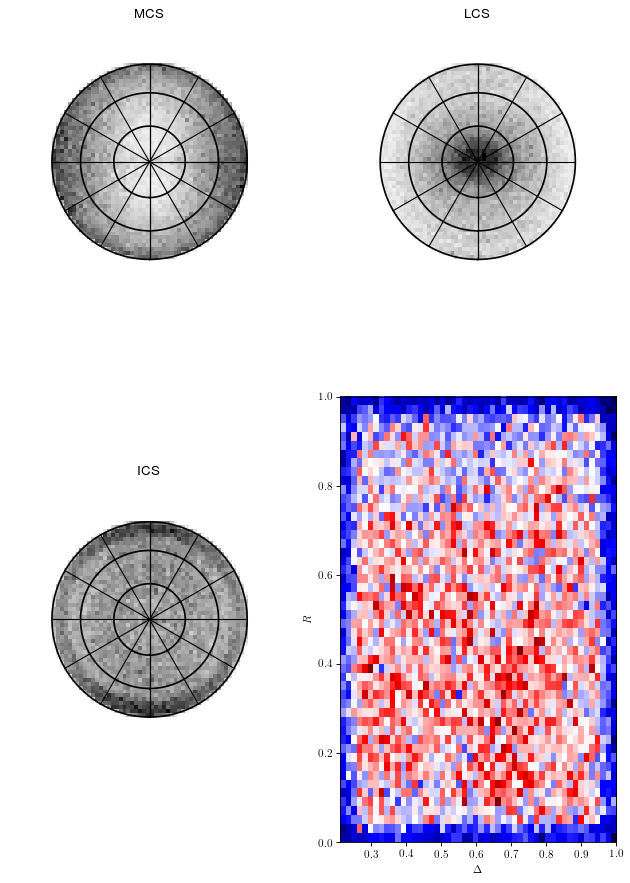

In [29]:
gs = gridspec.GridSpec(2, 3)

r1 = np.sqrt(2)
r2 = 1
r3 = 1/(np.sqrt(2+np.sqrt(3)))

x = np.linspace(-np.pi, np.pi, 1000)
theta = np.array([0, np.pi/6, np.pi/3, np.pi/2])
x_lines = r1*np.cos(theta)
y_lines = r1*np.sin(theta)

binsize = 50

plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])

ax.hist2d(phimcs, thetamcs, bins = binsize, cmap= "binary", zorder = 0)

ax.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_title('MCS')



ax1 = plt.subplot(gs[1, 0]) # row 0, col 1
ax1.hist2d(phiics, thetaics, bins = binsize, cmap= "binary", zorder = 0)

ax1.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax1.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax1.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax1.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax1.set_axis_off()
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('ICS')

ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])


ax2 = plt.subplot(gs[0, 1]) # row 1, span all columns
ax2.hist2d(philcs, thetalcs, bins = binsize, cmap= "binary", zorder = 0)

ax2.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax2.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax2.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax2.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax2.set_axis_off()
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_title('LCS')

rc('text', usetex=True)
ax3 = plt.subplot(gs[1, 1]) # row 1, span all columns
ax3.hist2d(R, Delta, bins = binsize, cmap = 'seismic')
ax3.set_xlabel(r'$\Delta$')
ax3.set_ylabel(r'$R$')




plt.tight_layout()

plt.savefig('test5.pdf')
plt.show()

In [4]:
rakes = np.loadtxt('rakes_1.txt', delimiter=',')


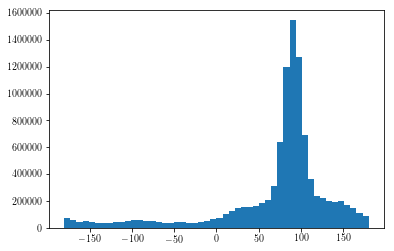

In [5]:
plt.hist(rakes[:, 0]*180/np.pi, bins = 50)
plt.show()

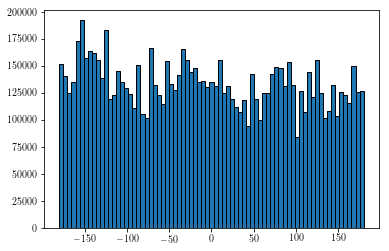

In [35]:
plt.hist(phi*180/np.pi, bins = 75, edgecolor = 'black')
plt.show()


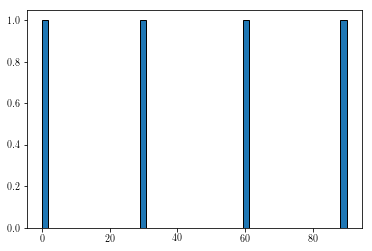

In [36]:
plt.hist(theta*180/np.pi, bins = 50, edgecolor = 'black')
plt.show()


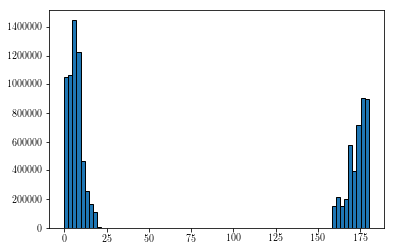

In [37]:
plt.hist(rho*180/np.pi, bins = 75, edgecolor = 'black')
plt.show()


ValueError: operands could not be broadcast together with shapes (4,) (10000000,) 

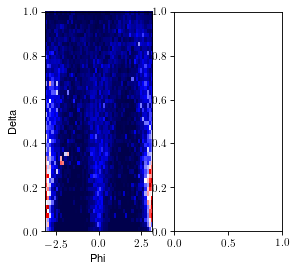

In [22]:
gs = gridspec.GridSpec(2, 4)

plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])
ax.hist2d(phi, Delta, bins = 50, cmap = 'seismic')
ax.set_xlabel('Phi')
ax.set_ylabel('Delta')

ax1 = plt.subplot(gs[0, 1])
ax1.hist2d(theta, Delta, bins = 50, cmap = 'seismic')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Delta')

ax2 = plt.subplot(gs[0, 2])
ax2.hist2d(rho, Delta, bins = 50, cmap = 'seismic')
ax2.set_xlabel('Rho')
ax2.set_ylabel('Delta')

ax = plt.subplot(gs[1, 0])
ax.hist2d(phi, R, bins = 50, cmap = 'seismic')
ax.set_xlabel('Phi')
ax.set_ylabel('R')

ax1 = plt.subplot(gs[1, 1])
ax1.hist2d(theta, R, bins = 50, cmap = 'seismic')
ax1.set_xlabel('Theta')
ax1.set_ylabel('R')

ax2 = plt.subplot(gs[1, 2])
ax2.hist2d(rho, R, bins = 50, cmap = 'seismic')
ax2.set_xlabel('Rho')
ax2.set_ylabel('R')


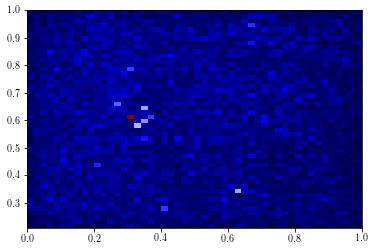

In [23]:
plt.hist2d(Delta, R, bins = 50, cmap = 'seismic')
plt.show()

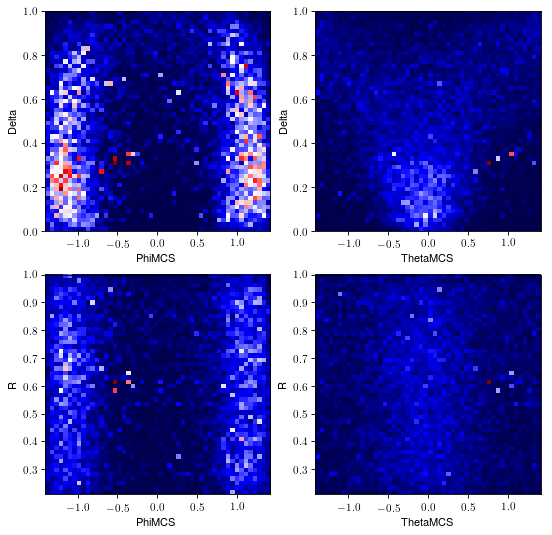

In [24]:
gs = gridspec.GridSpec(2,2)

plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])
ax.hist2d(phimcs, Delta, bins = 50, cmap = 'seismic')
ax.set_xlabel('PhiMCS')
ax.set_ylabel('Delta')

ax1 = plt.subplot(gs[0, 1])
ax1.hist2d(thetamcs, Delta, bins = 50, cmap = 'seismic')
ax1.set_xlabel('ThetaMCS')
ax1.set_ylabel('Delta')



ax = plt.subplot(gs[1, 0])
ax.hist2d(phimcs, R, bins = 50, cmap = 'seismic')
ax.set_xlabel('PhiMCS')
ax.set_ylabel('R')

ax1 = plt.subplot(gs[1, 1])
ax1.hist2d(thetamcs, R, bins = 50, cmap = 'seismic')
ax1.set_xlabel('ThetaMCS')
ax1.set_ylabel('R')


plt.show()

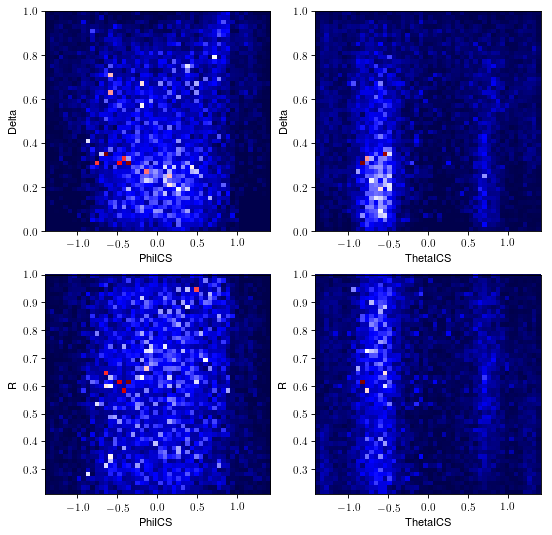

In [25]:
s = gridspec.GridSpec(2,2)

plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])
ax.hist2d(phiics, Delta, bins = 50, cmap = 'seismic')
ax.set_xlabel('PhiICS')
ax.set_ylabel('Delta')

ax1 = plt.subplot(gs[0, 1])
ax1.hist2d(thetaics, Delta, bins = 50, cmap = 'seismic')
ax1.set_xlabel('ThetaICS')
ax1.set_ylabel('Delta')



ax = plt.subplot(gs[1, 0])
ax.hist2d(phiics, R, bins = 50, cmap = 'seismic')
ax.set_xlabel('PhiICS')
ax.set_ylabel('R')

ax1 = plt.subplot(gs[1, 1])
ax1.hist2d(thetaics, R, bins = 50, cmap = 'seismic')
ax1.set_xlabel('ThetaICS')
ax1.set_ylabel('R')


plt.show()

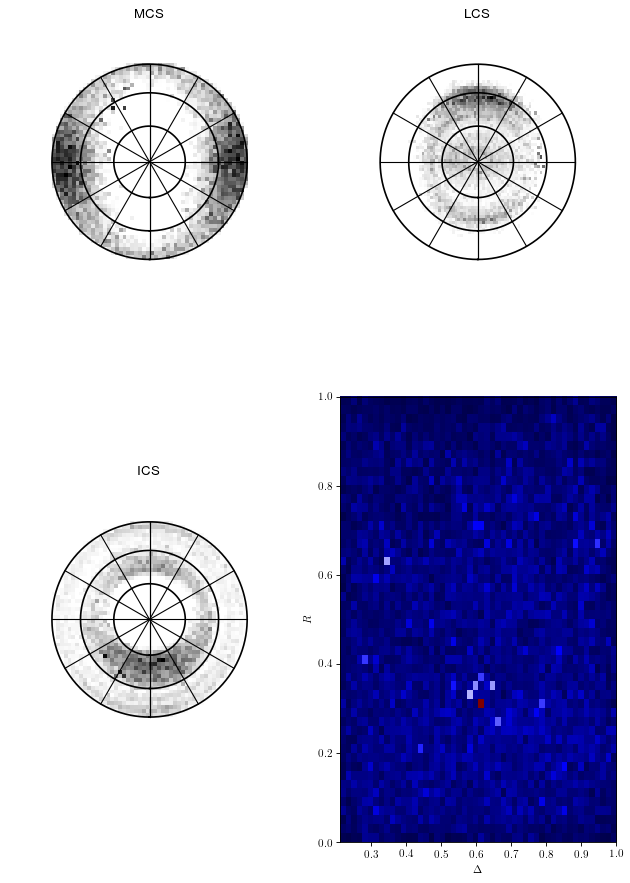

In [26]:
gs = gridspec.GridSpec(2, 3)

r1 = np.sqrt(2)
r2 = 1
r3 = 1/(np.sqrt(2+np.sqrt(3)))

x = np.linspace(-np.pi, np.pi, 1000)
theta = np.array([0, np.pi/6, np.pi/3, np.pi/2])
x_lines = r1*np.cos(theta)
y_lines = r1*np.sin(theta)


plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])

ax.hist2d(phimcs, thetamcs, bins = 50, cmap= "binary", zorder = 0)

ax.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_title('MCS')



ax1 = plt.subplot(gs[1, 0]) # row 0, col 1
ax1.hist2d(phiics, thetaics, bins = 50, cmap= "binary", zorder = 0)

ax1.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax1.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax1.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax1.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax1.set_axis_off()
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('ICS')

ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])


ax2 = plt.subplot(gs[0, 1]) # row 1, span all columns
ax2.hist2d(philcs, thetalcs, bins = 50, cmap= "binary", zorder = 0)

ax2.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax2.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax2.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax2.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax2.set_axis_off()
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_title('LCS')

rc('text', usetex=True)
ax3 = plt.subplot(gs[1, 1]) # row 1, span all columns
ax3.hist2d(R, Delta, bins = 50, cmap = 'seismic')
ax3.set_xlabel(r'$\Delta$')
ax3.set_ylabel(r'$R$')




plt.tight_layout()

plt.savefig('test5.pdf')
plt.show()

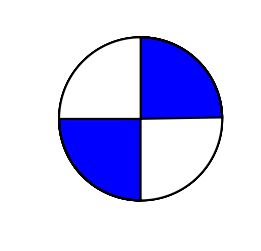

In [30]:
beach1 = beach([0, 90, 0], xy=(0, 0), width=30)


ax = plt.gca()
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_aspect("equal")
ax.set_axis_off()
ax.add_collection(beach1) 

plt.savefig('BBFm1.pdf')

/home/rwcline/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


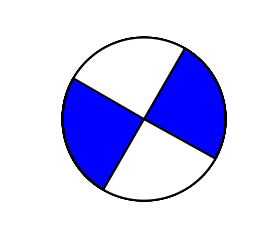

In [8]:
beach1 = beach([30, 90, 0], xy=(0, 0), width=30)


ax = plt.gca()
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_aspect("equal")
ax.set_axis_off()
ax.add_collection(beach1) 

plt.savefig('BBFm2.pdf')

0.03490658503988659

0.6283185307179586